#**THE SPARK FOUNDATION**

### Data Science and Business Analytics Intern - Sushmitha TP

TASK : **Decison Tree Classifier and EDA**

DATASET : Iris Dataset

LANGUAGE : Python





 ## Decision Tree Classifier
 #####   Decision Tree Classifier is a simple and widely used classification technique. It applies a straitforward idea to solve the classification problem

 ## Iris Dataset
 ##### It consists of 4 attributes SepalLength SepalWidth PetalLength PetalWidth with the information gain from this we classify Iris Specis as Iris-setosa,Iris-versicolor or Iris-virginica.

Lets begin by importing required libraries and dataset.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
from sklearn import tree



In [4]:
#setting the size of the figures using matplotlib
plt.rcParams['figure.figsize'] = (15.0, 5.0)

In [6]:
iris = pd.read_csv('Iris.csv')

### Exploring Data Set

In [7]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


We can observe that Id attribute is not related to tree classification and it can be removed.

In [10]:
iris.drop(["Id"],axis=1,inplace=True)
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [11]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [12]:
iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [14]:
iris.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


Lets check for null values in iris dataset

In [13]:
iris.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Since there is no null value in any attribute we can continue with eda and model construction.

### Visualizations 

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


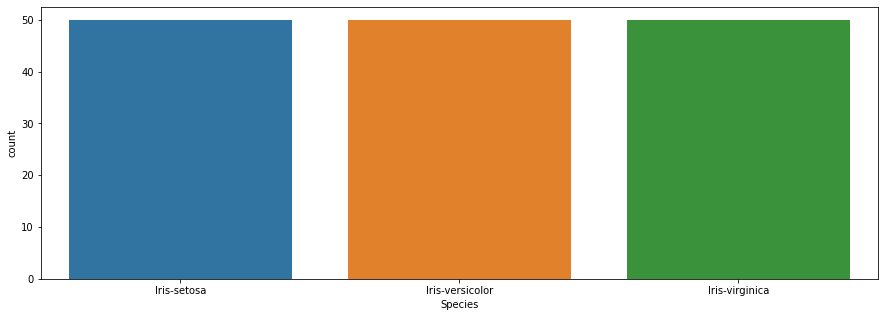

In [15]:

sns.countplot(iris['Species'])

From the visualization we see that all 3 species are in equal instances in datset


In [18]:
iris['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

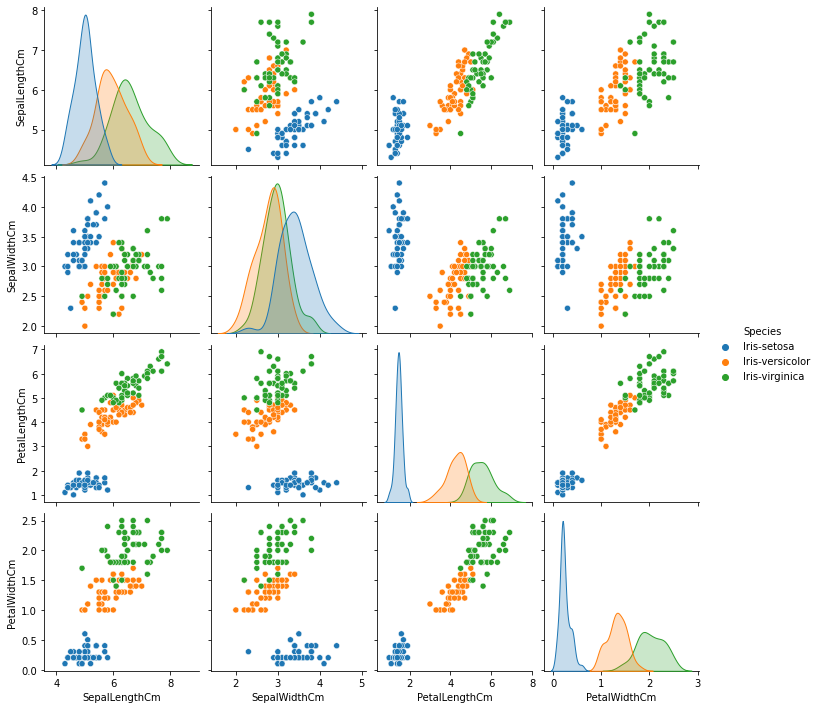

In [19]:
sns.pairplot(iris,hue='Species')

This shows the distribution of each attributes in their range

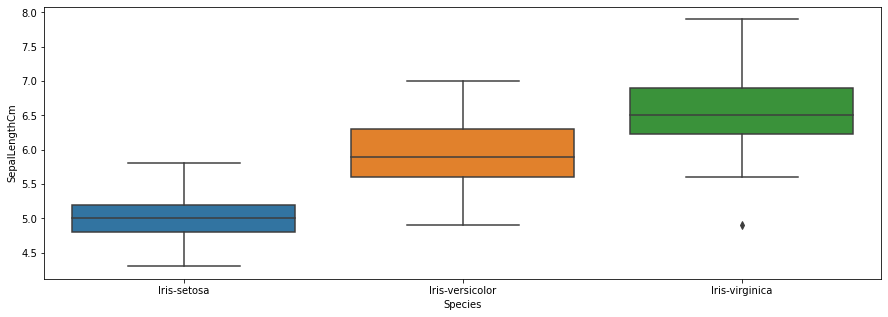

In [21]:
sns.boxplot(x='Species', y='SepalLengthCm',data=iris)


From this we can say that setosa have smallest Sepal Length and Virginica have largest Sepal Length

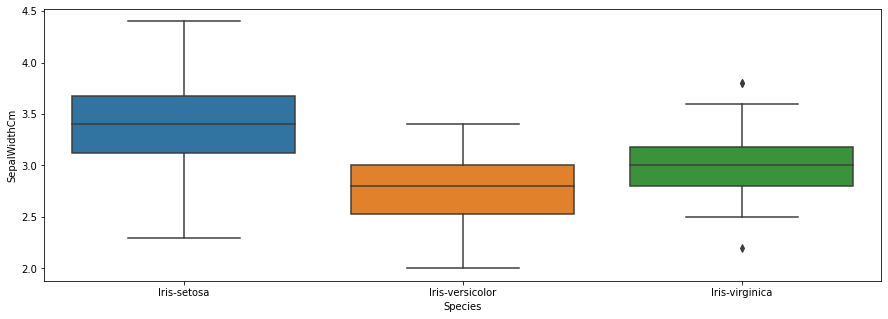

In [22]:
sns.boxplot(x='Species', y='SepalWidthCm',data=iris)

We can say that Setosa seems to have most spread in Sepal Width than other species

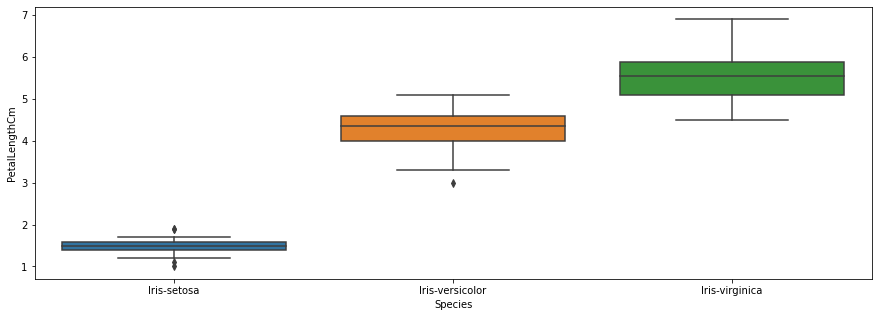

In [23]:
sns.boxplot(x='Species', y='PetalLengthCm',data=iris)


We can say that Setosa has smallest Petal length and Virginica has largest Petal length 

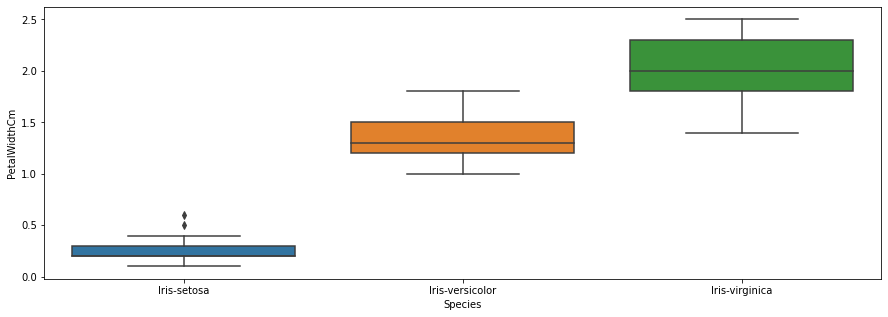

In [25]:
sns.boxplot(x='Species', y='PetalWidthCm',data=iris)


We can say that Setosa has smallest Petal width and Virginica has largest Petal width

####As now we are familiar with our dataset we can start with building Decision Tree Model

### **Feature Selection and Splitting between Training and Test Set**

In [31]:

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [27]:
x=iris.iloc[:,iris.columns!="Species"]
y=iris.iloc[:,iris.columns=="Species"]

In [29]:
x.head()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [30]:
y.head()

,Species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa


In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=0)


### **Decision Tree**




In [33]:
model=DecisionTreeClassifier()

**Train model**

In [34]:
model.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

**Testing and Visualizating Tree model**

In [35]:
outputDTC=model.predict(x_test)
print(outputDTC) 

['Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-virginica' 'Iris-setosa' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa']


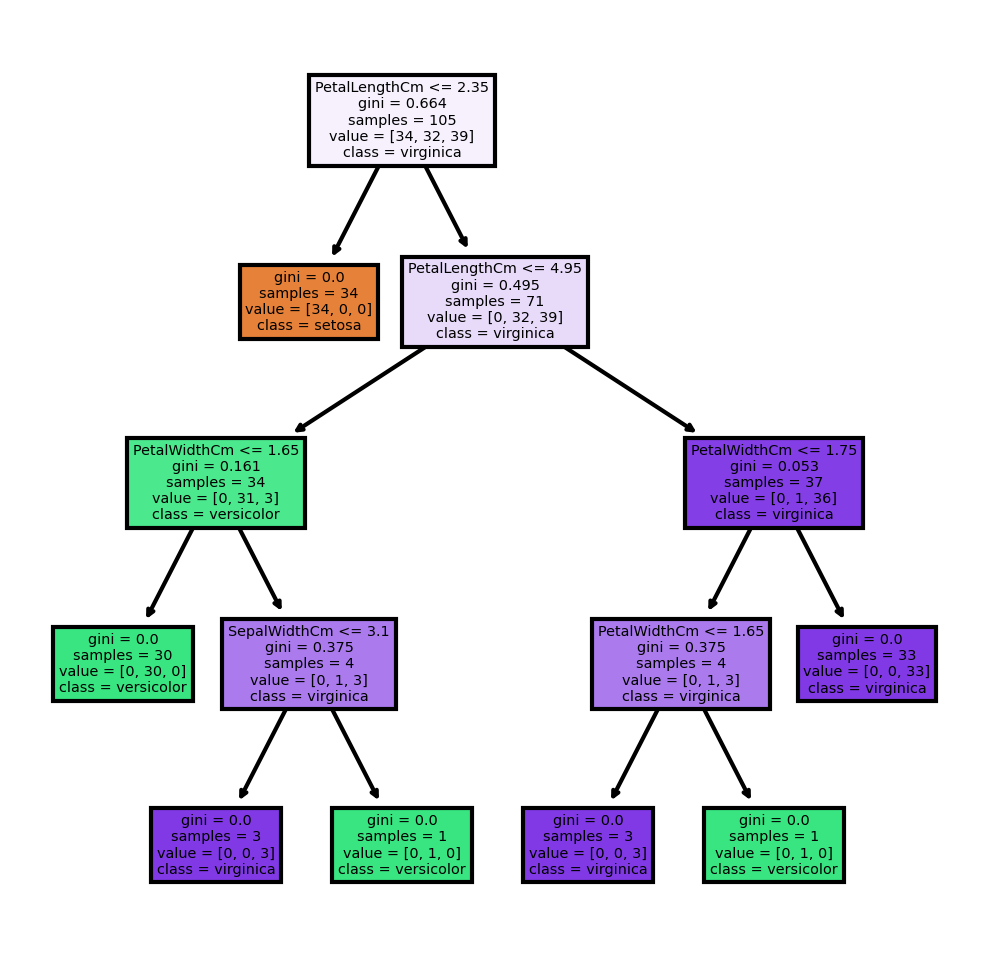

In [36]:
names=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
classes=['setosa','versicolor','virginica']
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(4,4),dpi=300)
tree.plot_tree(model,feature_names=names,class_names=classes,filled= True);

**Check the Accuracy of Predictions**

In [37]:
accuracy=accuracy_score(y_test,outputDTC)
print("accuracy score:",accuracy)

accuracy score: 0.9777777777777777


**Constructing Confusion Matrix**

In [41]:
confusion_matrix(y_test,outputDTC)


array([[16,  0,  0],
       [ 0, 17,  1],
       [ 0,  0, 11]])

As this shows an accuracy of 97% for Test set we can choose this model.